Checking out the kaggle Titanic Challenge at the following link:

https://www.kaggle.com/c/titanic-gettingStarted

In [7]:
# lets open the file with pandas 
import pandas as pd
from pandas import Series,DataFrame

# setting up the titanic csvfile as a DataFrame
titanic_df = pd.read_csv('train.csv')

In [8]:
# lets see a preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
# getting the overall info for the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Lets answer some basic questions:

1.) Who were the passengers on the titanic? (Ages,Gender,Class..etc)

2.) what deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?


We will then dig deeper,with a broader question:

5.) What factors helped someone survive the sinking?

1.) Who were the passengers on the titanic?

In [5]:
# lets import what we will need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

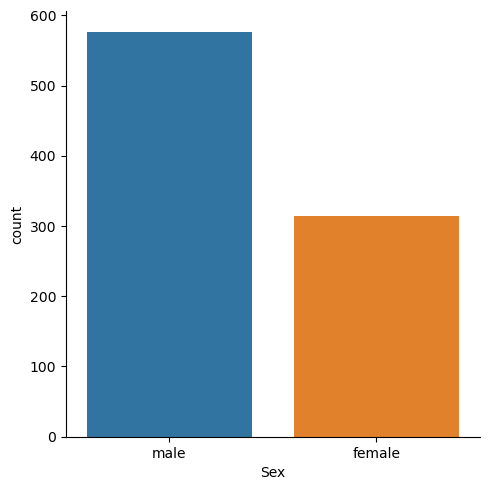

In [24]:
# checking gender
sns.catplot(x='Sex',data=titanic_df,kind='count')

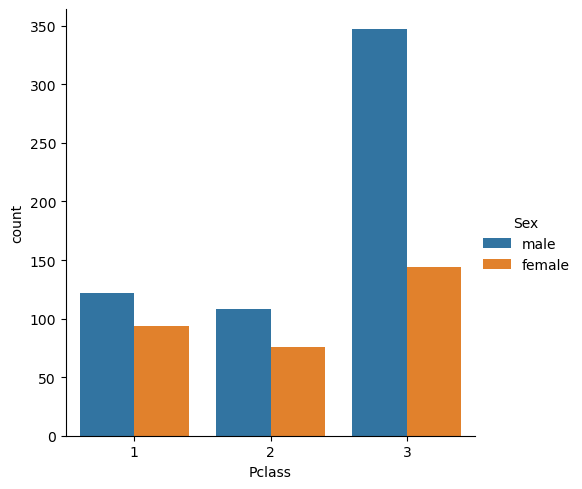

In [28]:
# lets seperate the genders by classes.use the hue argument
sns.catplot(x='Pclass',data=titanic_df,kind='count',hue='Sex')

Quite a few more males in third class than females,an interesting find.It also might be useful knowing the split 
between males,females and children.
lets do this as well

In [29]:
# we'll treat anyone as under 16 as a child,then use the apply technique

# First lets make a function to sort through the sex
def male_female_child(Passenger):
    # Take the Age and Sex
    Age,Sex = Passenger
    # Compare the age, otherwise leave the sex
    if Age < 16:
        return 'child'
    else:
        return Sex
    
# we will define a new column called 'person' Specify the axis=1
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [30]:
# Check the first ten rows
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Now we have seperated the passengers between female,male and child.This will be important later on
because of the famous "women and children first policy"

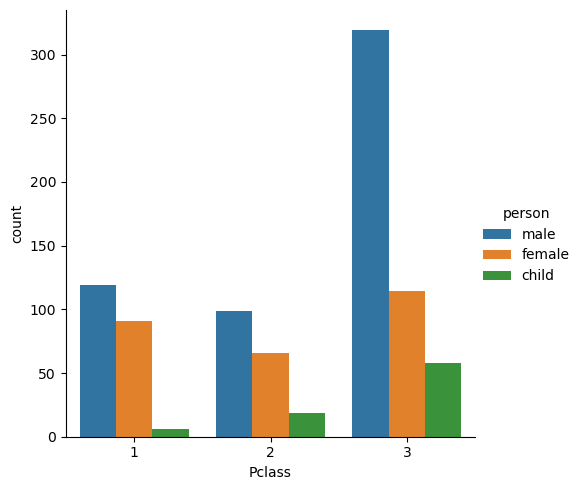

In [32]:
# lets check the factor plot 
sns.catplot(x='Pclass',data=titanic_df,kind='count',hue='person')

There's quite a number of children in 3rd class and not so many in 1st.

Lets create a distribution of ages to get a more precise picture of who the passengers were

<AxesSubplot:>

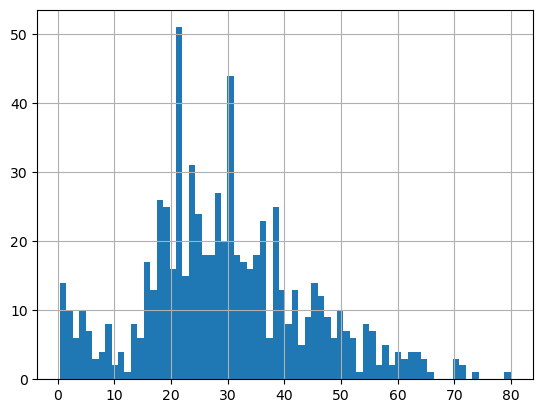

In [33]:
#creating a histogram using pandas
titanic_df['Age'].hist(bins=70)

In [34]:
# check the mean
titanic_df['Age'].mean()

29.69911764705882

In [35]:
# we could also get a quick overall comparison of male,female,child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

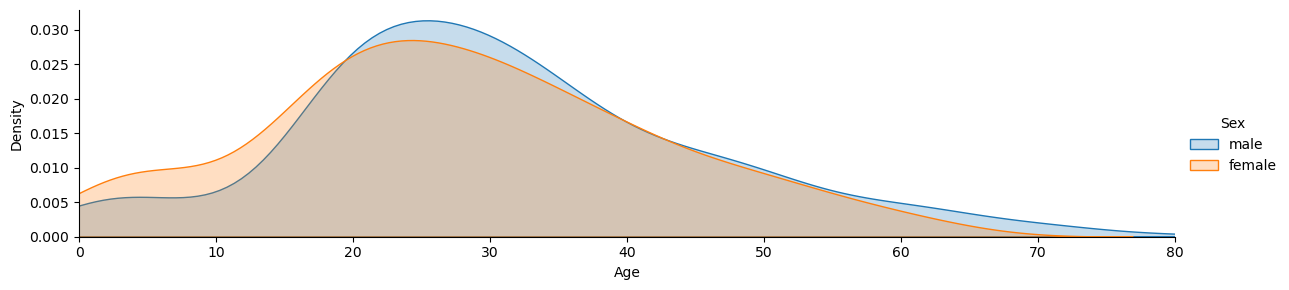

In [37]:
# Another way to visualize the data is to use FacetGrid to plot multiple kdeplots on one plot
fig = sns.FacetGrid(titanic_df, hue='Sex',aspect=4)

# Using map to plot all the possible kdeplots for the age column by the hue
fig.map(sns.kdeplot,'Age',shade=True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

# Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

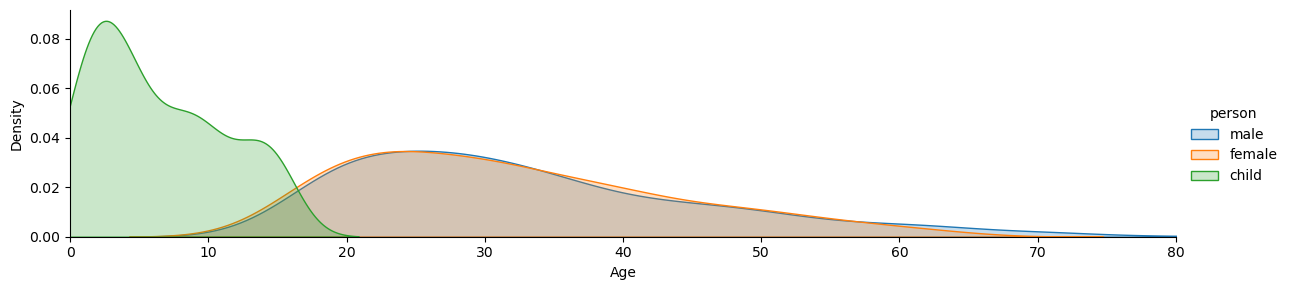

In [38]:
# including children by passing hue of 'person' column
fig = sns.FacetGrid(titanic_df, hue='person',aspect=4)

# Using map to plot all the possible kdeplots for the age column by the hue
fig.map(sns.kdeplot,'Age',shade=True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

# Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

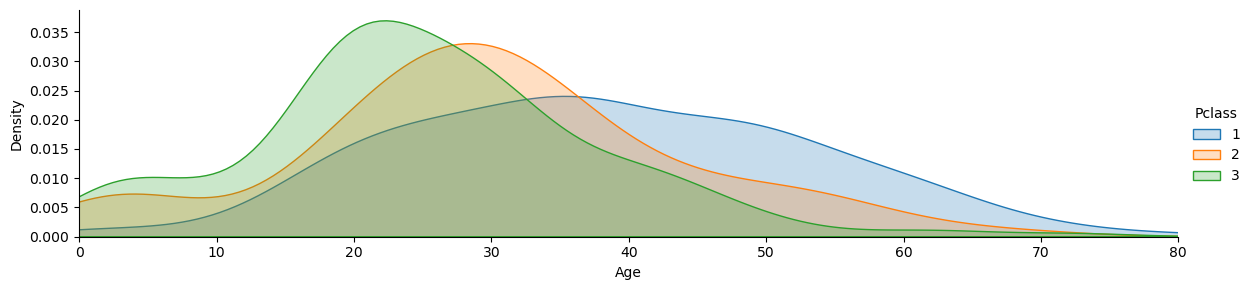

In [39]:
# lets do the same for class by changing the hue argument as well
fig = sns.FacetGrid(titanic_df, hue='Pclass',aspect=4)

# Using map to plot all the possible kdeplots for the age column by the hue
fig.map(sns.kdeplot,'Age',shade=True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

# Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

We have gotten a pretty good picture of who the passengers were based on Sex,Age and class

2.) What deck were the passengers on and how does that relate to their class

In [40]:
# Lets look at our dataset again
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


The Cabin column has information on the deck but it has several NaN values.so will have to drop them

In [41]:
# dropping the NaN values
deck = titanic_df['Cabin'].dropna()

In [42]:
# Quick preview of the deck
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [43]:
deck.tail()

871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, dtype: object

Notice we only need the first letter of the deck to classify its level(e.g A,B,C,D,E,F,G)

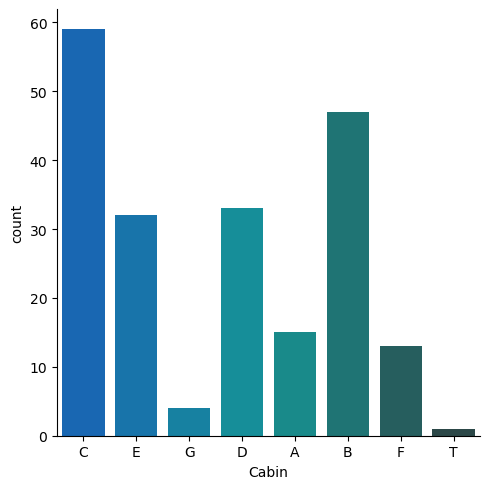

In [45]:
# So lets grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])
    
# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot(x='Cabin',data=cabin_df,palette='winter_d',kind='count')

Note we have a 'T' deck value there which doesnt make any sense we can as well drop it down

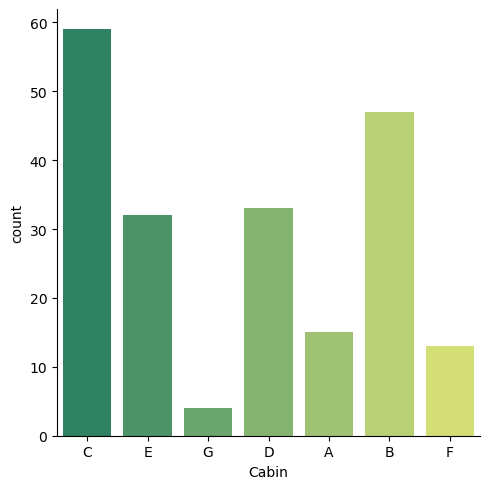

In [46]:
#Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']

#Replot
sns.catplot(x='Cabin',data=cabin_df,palette='summer',kind='count')

We have now analyzed the distribution by decks. We can see that deck C has got the most number of passengers

3.) Where did the passengers come from?

In [47]:
# lets take a look at our dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


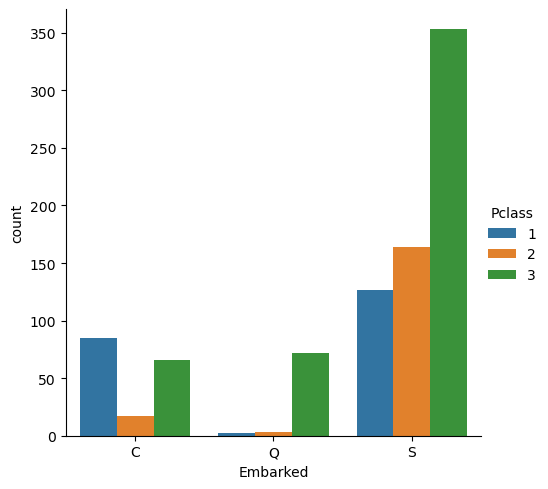

In [50]:
# The embarked column tells us the cities.They are named by letters.S=Southampton C=Charboge Q=Queenstown

# Now we can make a factorplot to check out results
sns.catplot(x='Embarked',data=titanic_df,hue='Pclass',kind='count',order=['C','Q','S'])

We can see that in Queenstown,almost all the passengers from there boarded 3rd class.It would be interesting to check the economics of that town in that period for further investigation.In Charbog we see there's a high number of passengers boarding the 1st class

4.) Who was alone and Who was with Family?

In [51]:
# Lets start by adding a new column to define alone

# we'll add the parent/child column with sibsp column
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

Now we know that if the Alone column is anything but 0,then the passenger had family aboard and wasnt alone.So
lets change the column so that if the value is greater than 0,we know the passenger was with his/her family

In [52]:
# look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] ==0] = 'Alone'


/var/folders/dy/vnhrn4qx6lb32m3cy82bdgs80000gn/T/ipykernel_44099/1659411232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'


In [53]:
# lets check to see if it worked
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


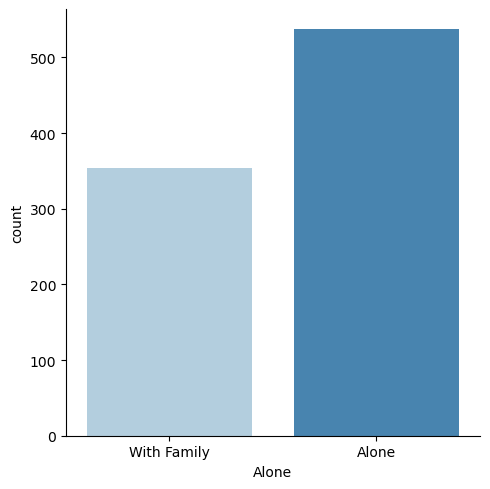

In [56]:
# getting a simple visualization
sns.catplot(x='Alone',data=titanic_df,palette='Blues',kind='count')

We can see that most people on the board were alone

Now we getting to the (open-ended) question: 5.) What factors helped someone survive the sinking?

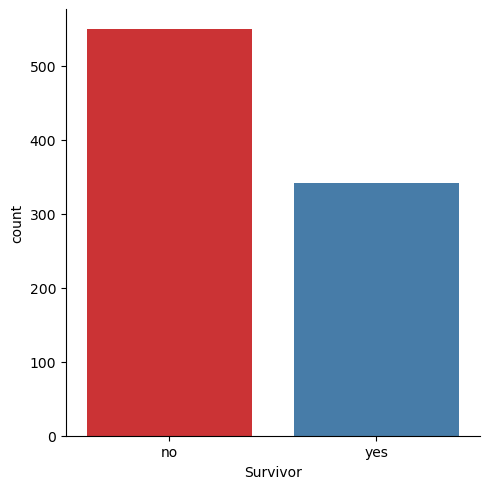

In [58]:
# Lets create a new column for legibility purposes through mapping
titanic_df['Survivor'] = titanic_df.Survived.map({0: 'no', 1: 'yes'})

# Lets get a quick view of survived vs died
sns.catplot(x='Survivor',data=titanic_df,palette='Set1',kind='count')

Quite a few people survived compared to those who died.Lets see if the class of the passengers had an effect
on their survival rate.

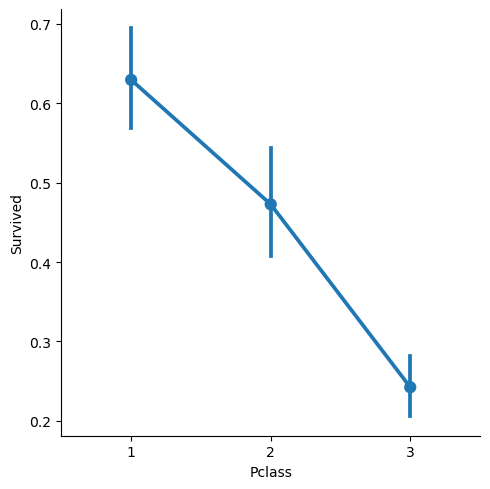

In [73]:
# lets consider the class 
sns.catplot(x='Pclass',y='Survived',data=titanic_df,kind='point')

It looks like survival rates for the third class are lower.But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children.we will use Hue to get a clear picture
as well

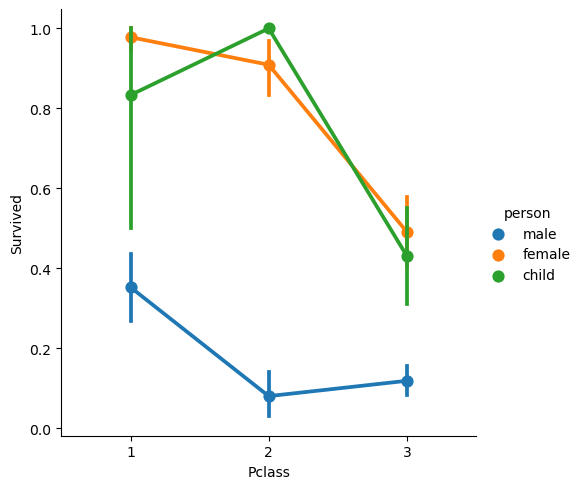

In [79]:
# Lets use a catplot again but now we are considering class and gender
sns.catplot(x='Pclass',y='Survived',data=titanic_df,kind='point',hue='person')

From this data it seems that being a male or being in 3rd class were both not favorable for survival.
Regardless of the class the result of a person being a male in any class decreases your chance of survival

 what about age? Did being younger or older have an effect on survival rate?

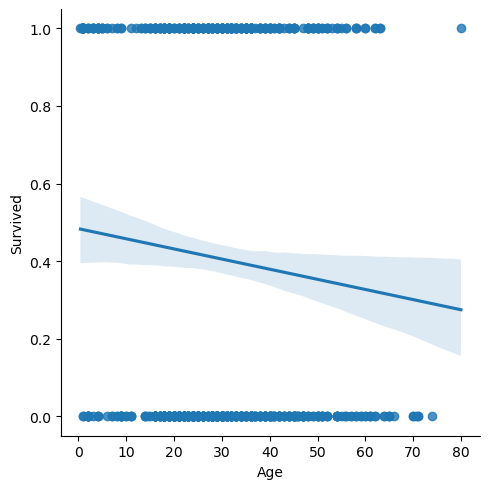

In [81]:
# Lets use a linear plot on age versus survival
sns.lmplot(x='Age',y='Survived',data=titanic_df)

There's a general trend that the older the passenger,the less likely they survived.

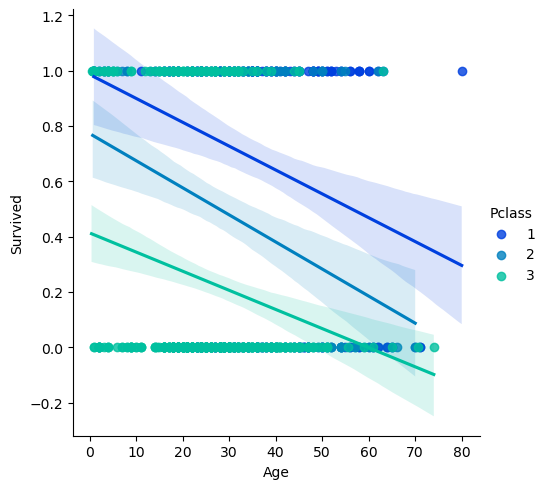

In [82]:
# Lets use Hue to take a look at the effect of class and age

# use a linear plot on age versus survival using hue for class seperation
sns.lmplot(x='Age',y='Survived',hue='Pclass',palette='winter',data=titanic_df)

From the data above lets use the x_bin argument to clean up this figure and grab the data and bin it by
age with a std attached

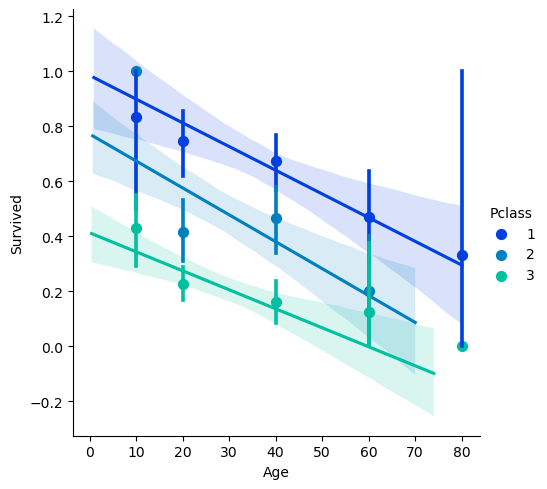

In [84]:
# Let's use a linear plot on age versus survival using hue for class seperation
# make a list
generations=[10,20,40,60,80]
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

There's really high standard deviation on the older 1st class passengers

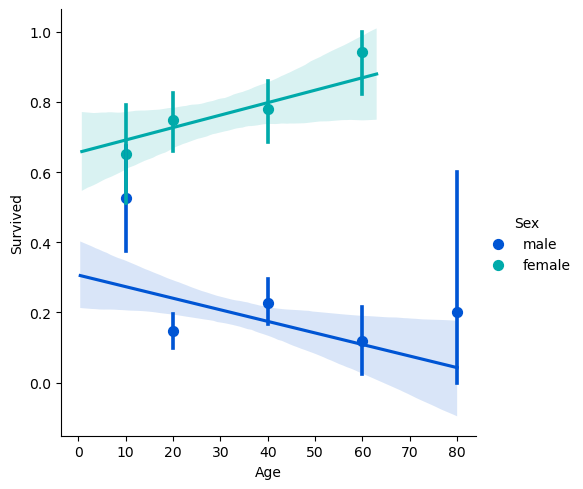

In [86]:
# What if we relate gender and age with the survival set?
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

we can see some really great insights on how gender,age and class all related to a passengers chance of survival


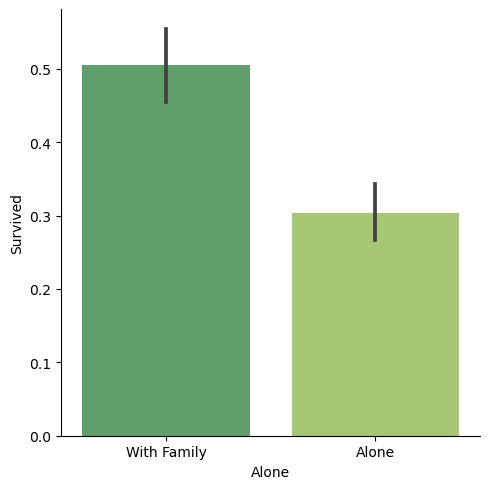

In [115]:
# Checking whether having a family member increase the odd of surviving the crash
sns.catplot(x='Alone',y='Survived',data=titanic_df,palette='summer',kind='bar')

We see that the chances of surviving being alone is quite low compared to being with a family.